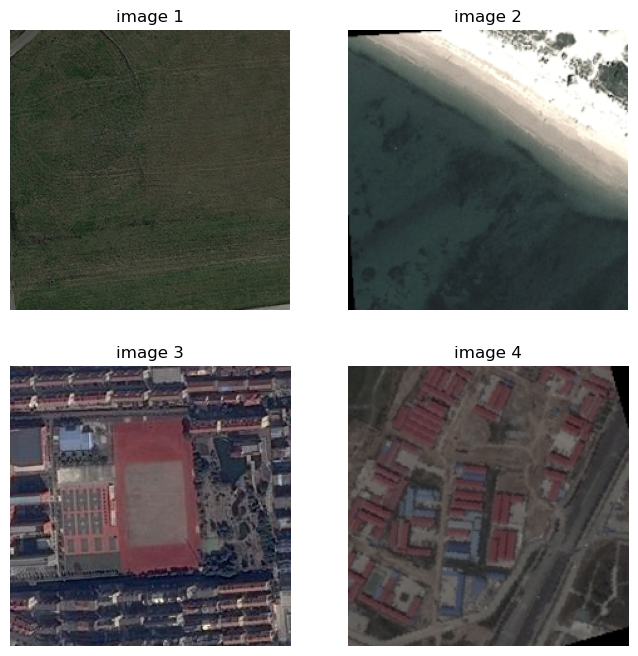

image 1 caption: it is a piece of green meadow .
image 2 caption: a piece of green ocean is near a yellow beach .
image 3 caption: many buildings are around a playground and six basketball fields .
image 4 caption: many buildings are in an industrial area .


In [2]:
from datasets.rsicd import RSICD
import torch
import matplotlib.pyplot as plt

dataset = RSICD("./data/RSICD/dataset_rsicd.json", "./data/RSICD/RSICD_images")
figure = plt.figure(figsize=(8, 8))
captions = []

for i in range(1, 5): 
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    sample = dataset[sample_idx]
    figure.add_subplot(2, 2, i)
    captions.append(sample["caption"])
    plt.title(f"image {i}")
    plt.axis("off")
    plt.imshow(sample["image"].permute(1, 2, 0))
plt.show()

for i in range(len(captions)):
    print(f"image {i + 1} caption: {captions[i]}")


In [ ]:
from torch.utils.data import DataLoader 

dataloader = DataLoader(dataset, batch_size=4, shuffle=True) 

for i, batch in enumerate(dataloader): 
    captions = []
    figure = plt.figure(figsize=(8, 8))
    for j in range(1, 5): 
        image = batch["image"][j - 1]
        captions.append(batch["caption"][j - 1])
        figure.add_subplot(2, 2, j)
        plt.title(f"image {j} of batch {i}")
        plt.axis("off")
        plt.imshow(image.permute(1, 2, 0))
    plt.show()

    for k in range(len(captions)):
        print(f"image {k + 1} caption of batch {i}: {captions[k]}")
    
    if i == 1:
        break

In [ ]:
from torchvision import transforms as t

image = dataset[0]["image"] 
plt.imshow(image.permute(1, 2, 0))
plt.show()
transform =  t.ColorJitter(brightness=(0.5, 1.10), saturation=(0.65, 2.5))
image = transform(image)
plt.imshow(image.permute(1, 2, 0))
plt.show()

In [ ]:
from datasets.transforms import RandomSharpness 

T = RandomSharpness(p=0.6) 
image = T(image)
plt.imshow(image.permute(1, 2, 0))
plt.show()